<a href="https://colab.research.google.com/github/akithaUdara/recklessDriving/blob/main/recklessDrivingDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reckless Driving Prediction

In [ ]:
#Importing all required libraries to work with dataset
import numpy as np
import pandas as pd
import seaborn as sns # For data visualization
import matplotlib.pyplot as plt # For data visualization
%matplotlib inline

In [ ]:
#Reading the dataset in the "recklessDrivingData.csv" using pandas
rdDataset = pd.read_csv("C:/Users/Akitha/Desktop/recklessDrivingData.csv")

In [ ]:
#Gives first 5 entries of a dataframe by default
rdDataset.head()

,acceleration,speed,highway,reckless
0,3.1,10.38,0,0
1,3.0,10.80,0,0
2,2.0,7.20,0,0
3,3.0,40.80,1,0
4,4.5,100.00,1,1


In [ ]:
#Checking the columns
rdDataset.columns

Index([u'acceleration', u'speed', u'highway', u'reckless'], dtype='object')

In [ ]:
#Checking for non-values in the dataset
rdDataset.isnull().sum()

acceleration    0
speed           0
highway         0
reckless        0
dtype: int64

In [ ]:
#Dataset information
rdDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 4 columns):
acceleration    569 non-null float64
speed           569 non-null float64
highway         569 non-null int64
reckless        569 non-null int64
dtypes: float64(2), int64(2)
memory usage: 17.9 KB


In [ ]:
#Exploring our reckless variable and visualizing it. 
count = rdDataset.reckless.value_counts()
count

1    361
0    208
Name: reckless, dtype: int64

Text(0,0.5,'Count')

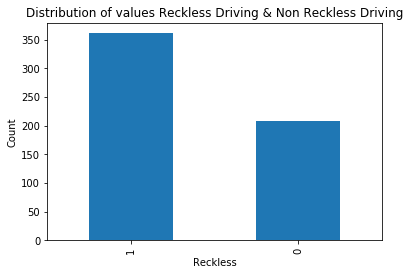

In [ ]:
#Visualizing of the distribution using a simple plot function of the matplotlib library
count.plot(kind='bar')
plt.title("Distribution of values Reckless Driving & Non Reckless Driving")
plt.xlabel("Reckless")
plt.ylabel("Count")

In [ ]:
#Our target class is Reckless
y_target = rdDataset['reckless']

In [ ]:
#Features which are available in te dataset
rdDataset.columns.values

array(['acceleration', 'speed', 'highway', 'reckless'], dtype=object)

In [ ]:
#Plotting out the pairplot of different features to determine which features are better at classifying the two classes of our problem
rdDataset['target'] = rdDataset['reckless'].map({0:'Reckless',1:'Non_Reckless'})

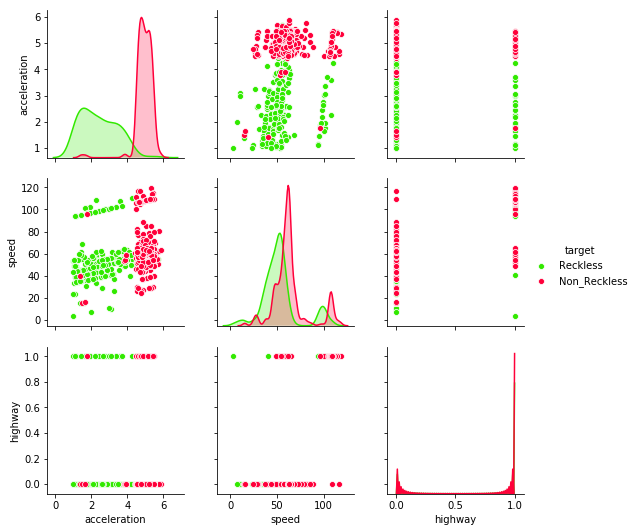

In [ ]:
g = sns.pairplot(rdDataset.drop('reckless', axis = 1), hue="target", palette='prism');

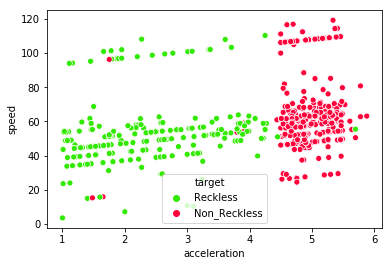

In [ ]:
#Features of acceleration and speed seem to be most relevent
#Plotting x-axis ='acceleration' and y-axis = 'speed'
sns.scatterplot(x='acceleration', y = 'speed', data = rdDataset, hue = 'target', palette='prism')

In [ ]:
features = ['speed', 'acceleration', 'highway']

In [ ]:
X_feature = rdDataset[features]

In [ ]:
#Taking all features
# X_feature = bcDataset.drop(['target','diagnosis'], axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#Splitting the data into traing data(70%) and test data(30%)
X_train, X_test, y_train, y_test= train_test_split(X_feature, y_target, test_size=0.3, random_state = 42)

In [ ]:
#Import Logistic Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
#Instantiate the Logistic Regression model
logreg = LogisticRegression()

In [ ]:
#Use fit() function to train your model
logreg.fit(X_train, y_train)

C:\Users\Akitha\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [ ]:
#Predictions are done on the Test Data
y_pred = logreg.predict(X_test)
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1], dtype=int64)

In [ ]:
#Actual test values are compared with the predicted predicted values to compute the accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy of the model using Logistic Regression:", acc*100)

('Accuracy of the model using Logistic Regression:', 90.05847953216374)


In [ ]:
#Model evaluation using Confusion Matrix
from sklearn.metrics import confusion_matrix

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

In [ ]:
conf_matrix

array([[ 47,  14],
       [  3, 107]], dtype=int64)

Text(0.5,15,'Predicted label')

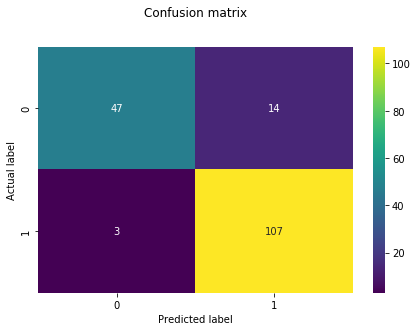

In [ ]:
#Model evaluation using Confusion Matrix
sns.heatmap(pd.DataFrame(conf_matrix), annot=True, cmap="viridis" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')